<a href="https://colab.research.google.com/github/OlenaIVA/PET-projects/blob/main/airline_passengers_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Airline Passenger Dataset https://www.kaggle.com/datasets/billykal/airline-passengers/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Load the dataset
data = pd.read_csv("/content/airline-passengers.csv")

In [4]:
# Change data
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# show 10 first lines
print(data.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


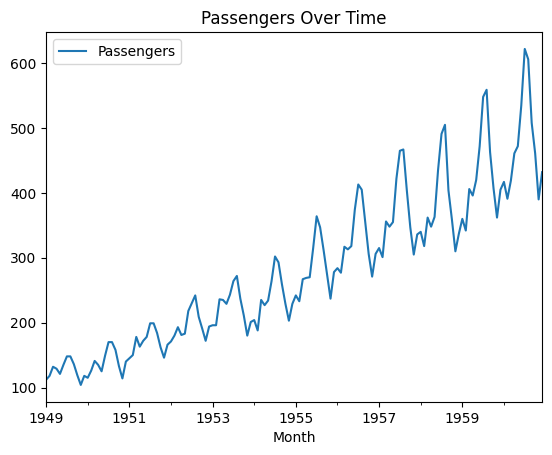

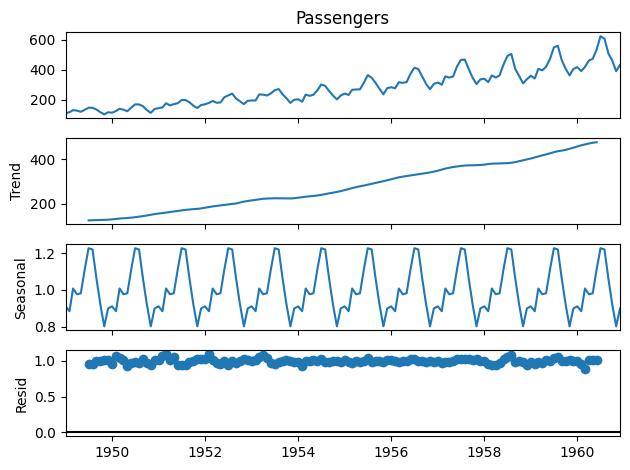

In [5]:
# buld a graph
data.plot(title="Passengers Over Time")
plt.show()

# Decomposition
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()


Decomposition is a method in time series analysis used to break down a complex time series into its individual components. This helps to better understand the underlying patterns, trends, and seasonalities in the data. Decomposition assumes that a time series is composed of the following components:

Original Time Series (Passengers Over Time):
The top graph shows the observed data with increasing trends and seasonal peaks.

Trend:
This is the long-term progression of the data. The graph shows that the number of passengers is steadily increasing over the years.

Seasonal Component:
The repeating pattern indicates strong seasonality, with consistent peaks and troughs within a year. This reflects higher passenger volumes during specific months (e.g., summer).

Residuals (Noise):
The random component shows the irregularities in the data after removing the trend and seasonal patterns.

In [6]:
from statsmodels.tsa.stattools import adfuller

#test data for stationary
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


The Augmented Dickey-Fuller (ADF) test is used to check whether a time series is stationary. Here’s how to interpret your results:

ADF Statistic: 0.815
This value is greater than the critical values, meaning the null hypothesis (non-stationarity) cannot be rejected.
p-value: 0.991
Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This indicates that the time series is not stationary.

Differencing the Time Series:
Subtract each value in the series from the previous value. This removes trends and makes the series more stationary.
You may need to apply first-order differencing (d=1) or seasonal differencing (D=1 for seasonal patterns).

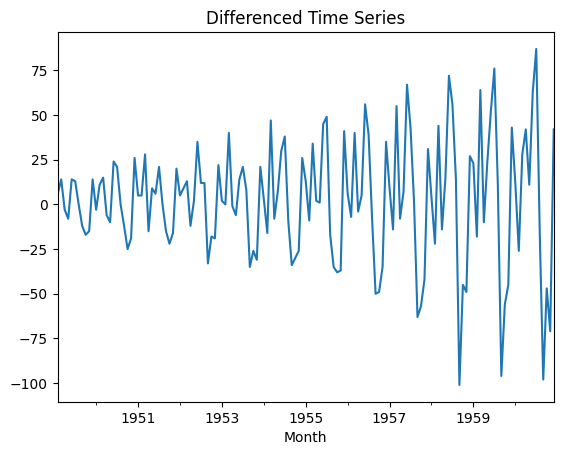

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [7]:
# First-order differencing
data_diff = data['Passengers'].diff().dropna()

# Plot the differenced series
data_diff.plot(title="Differenced Time Series")
plt.show()

# ADF test on differenced series
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


If the series exhibits strong seasonality, take the difference with a lag equal to the seasonal period (e.g., 12 for monthly data).

In [10]:
data_seasonal_diff = data['Passengers'].diff(12).dropna()

# Re-test for stationarity
from statsmodels.tsa.stattools import adfuller
result_seasonal = adfuller(data_seasonal_diff)
print('ADF Statistic (Seasonal Differencing):', result_seasonal[0])
print('p-value:', result_seasonal[1])


ADF Statistic (Seasonal Differencing): -3.383020726492481
p-value: 0.011551493085514952


In [11]:
import numpy as np
data_log = np.log(data['Passengers'])
data_log_diff = data_log.diff().dropna()


In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = sarima_model.fit()

# Forecast
forecast = result.forecast(steps=12)
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    449.331718
1961-02-01    424.388898
1961-03-01    459.039388
1961-04-01    497.868989
1961-05-01    509.867725
1961-06-01    568.261242
1961-07-01    655.813596
1961-08-01    641.195021
1961-09-01    546.398603
1961-10-01    496.805429
1961-11-01    427.680516
1961-12-01    471.243277
Freq: MS, Name: predicted_mean, dtype: float64


We use SARIMA model, because The SARIMA (Seasonal AutoRegressive Integrated Moving Average) model. It is used because it is well-suited for time series data that exhibits:

Seasonality:
SARIMA handles recurring patterns or cycles (e.g., yearly, monthly, or weekly trends). In the airline passenger dataset, you can observe a yearly seasonal pattern (e.g., peaks during summer and holidays).
Non-stationarity:
Real-world time series data often has trends or seasonality, making it non-stationary. SARIMA can integrate differencing (regular and seasonal) to make the data stationary, which is necessary for effective modeling.
Components of SARIMA:
AR (Auto-Regressive): Captures relationships between current and past values (lags).
I (Integrated): Differencing to remove trends and make the data stationary.
MA (Moving Average): Captures the relationship between current values and past forecast errors.
Seasonal Components: Adds terms to account for seasonal patterns (e.g., quarterly or annual cycles).

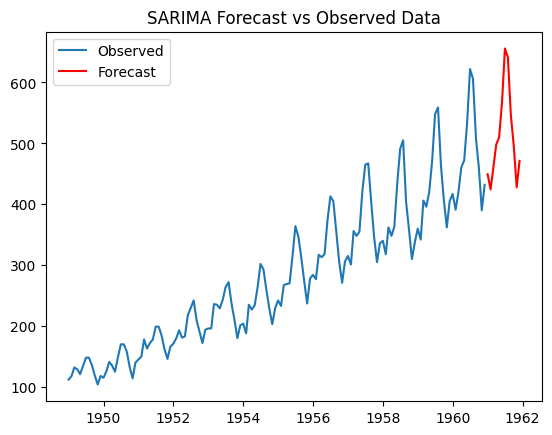

In [17]:
import matplotlib.pyplot as plt

# Plot original data
plt.plot(data['Passengers'], label='Observed')

# Plot forecasted data
forecast_index = pd.date_range(start='1961-01-01', periods=12, freq='MS')
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.legend()
plt.title('SARIMA Forecast vs Observed Data')
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Приклад оцінки
y_true = data['Passengers'][-12:]
mae = mean_absolute_error(y_true, forecast)
rmse = np.sqrt(mean_squared_error(y_true, forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 36.15786681652458
RMSE: 36.24142949700021


SARIMA Forecast vs Observed Data Plot:
The plot shows that the forecasted values (red line) follow the observed trend and seasonal patterns closely, indicating that the SARIMA model has captured the dynamics of the time series effectively.
Evaluation Metrics:
Mean Absolute Error (MAE): 36.16
This indicates the average difference between the predicted and actual values. A smaller value reflects better accuracy.
Root Mean Squared Error (RMSE): 36.24
RMSE penalizes larger errors more heavily than MAE. The values of MAE and RMSE being close indicate a consistent performance.